In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/

 gender_dataset_face	     Untitled0.ipynb
 gender_dataset_face_split   Untitled2.ipynb
 ImageClassificationYOLOv8   WeatherClassificationYOLOv8.ipynb
 Task_A			    'Weather Dataset'
 Task_A.zip


In [1]:
DATA_DIR = '/content/drive/MyDrive/Task_A/'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
#generators
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Task_A/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

#generators
val_data = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Task_A/val',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 1860 files belonging to 2 classes.
Found 410 files belonging to 2 classes.


In [4]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [5]:
#Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
run = model.fit(train_data,epochs=20,validation_data = val_data)

Epoch 1/20


#Before adding BatchNormalization,Dropout and epochs=10

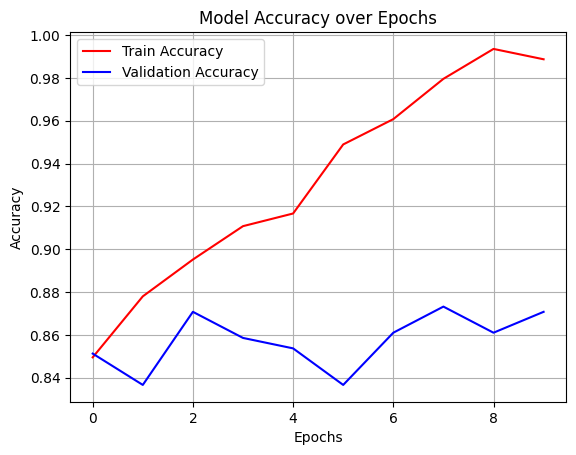

In [ ]:
import matplotlib.pyplot as plt

plt.plot(run.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(run.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


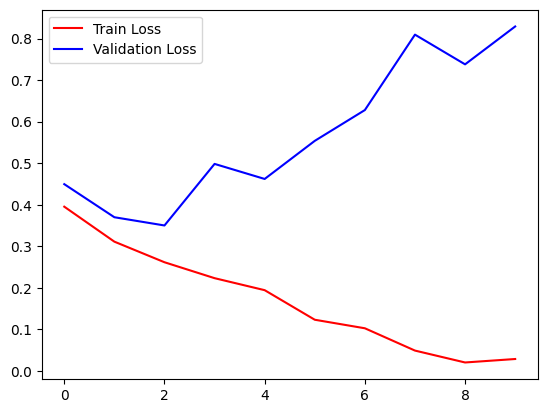

In [ ]:
plt.plot(run.history['loss'], color='red', label='Train Loss')
plt.plot(run.history['val_loss'], color='blue', label='Validation Loss')
plt.legend()
plt.show()

#After adding adding BatchNormalization,Dropout and epochs=20

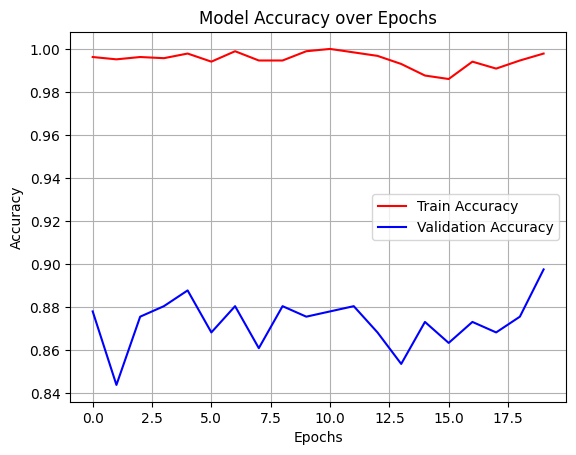

In [ ]:
import matplotlib.pyplot as plt

plt.plot(run.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(run.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

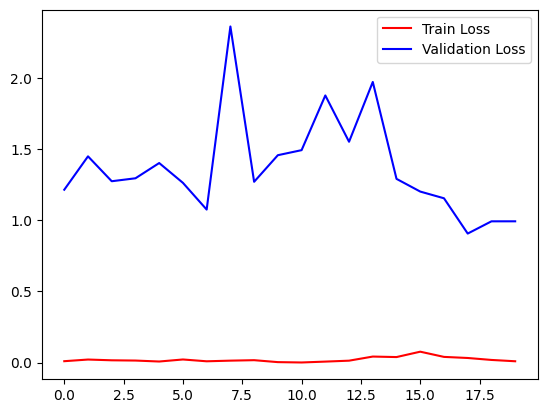

In [ ]:
plt.plot(run.history['loss'], color='red', label='Train Loss')
plt.plot(run.history['val_loss'], color='blue', label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
import cv2

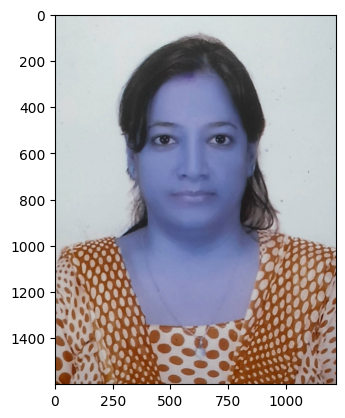

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/Maa pic.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(1600, 1217, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)